# Adaboost raiz_res

In [1]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import math



In [3]:

arq = open('c:\\dados\\ada.txt', 'r')
texto = arq.readlines()
arq.close()


lx1=[]
lx2=[]

X=[]
ly=[]

for l in texto:
   l1=l.split(",")
   lx1.append(float(l1[0]))
   lx2.append(float(l1[1]))
   ly.append(float(l1[2]))
   
   

X = np.array(list(zip(lx1,lx2)))


Y=np.array(ly)



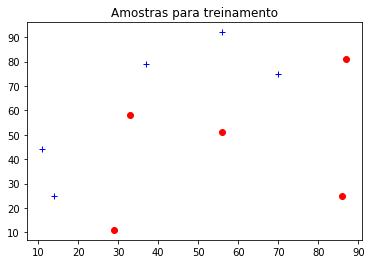

In [4]:
#Gráfico com as amostras para treinamento

for i in range(len(X)):
    if(Y[i]==1.0):plt.plot(X[i][0],X[i][1],'b+')
    else:plt.plot(X[i][0],X[i][1],'ro')
plt.title('Amostras para treinamento')    
plt.show()





In [18]:
num=10
m,n=X.shape
#soma dos pesos dá 1...
#pesos iniciais iguais para todas as amostras
w=(1/m)*np.ones(m)

#Cria o decision stump
ptree=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=1506876297, splitter='best')
pred_soma=np.zeros(m)

for i in range(num):
#   Treina com peso w
#  
    ptree.fit(X,Y,sample_weight = w)
    
#Previsão
    pred=ptree.predict(X)
    
   
    erro=[] #usado para erro (0,1)
    erro2=[] #usado para atualizar pesos (-1,1)

    for j in range(m):
        if(int(pred[j])==int(Y[j])):
            erro.append(0)
            erro2.append(-1.0)
        else:
            erro.append(1)
            erro2.append(1.0)
            
    
    e=np.inner(w,erro) #erro médio
    
    
    w_ant=w.copy()
    
    alpha=0.5*math.log((1-e)/e) #alpha     
   
    
    #atualizar pesos
    
    w=w*np.exp(alpha*np.array(erro2))
 
    #normalizar pesos (soma=1)
    sumw=w.sum()
    w=(1/sumw)*w

        
    print('Iteração ',i)
    for k in range(len(Y)):
        print('erro ',erro[k],'w antigo=',w_ant[k],' wnovo=',w[k])
    print('soma de erros=',sum(erro))
    
    print('soma_peso =',sum(w))
    print('erro_médio=',e)
    print('alpha=',alpha)
#   inclui o stump na prediçaõ geral
    pred_soma=pred_soma+alpha*pred
   

pred_soma=np.sign(pred_soma)  
print(pred_soma)
    


Iteração  0
erro  0 w antigo= 0.1  wnovo= 0.07142857142857144
erro  0 w antigo= 0.1  wnovo= 0.07142857142857144
erro  0 w antigo= 0.1  wnovo= 0.07142857142857144
erro  0 w antigo= 0.1  wnovo= 0.07142857142857144
erro  0 w antigo= 0.1  wnovo= 0.07142857142857144
erro  0 w antigo= 0.1  wnovo= 0.07142857142857144
erro  0 w antigo= 0.1  wnovo= 0.07142857142857144
erro  1 w antigo= 0.1  wnovo= 0.16666666666666666
erro  1 w antigo= 0.1  wnovo= 0.16666666666666666
erro  1 w antigo= 0.1  wnovo= 0.16666666666666666
soma de erros= 3
soma_peso = 1.0
erro_médio= 0.30000000000000004
alpha= 0.4236489301936017
*ps* [-0.42364893 -0.42364893 -0.42364893 -0.42364893 -0.42364893  0.42364893
  0.42364893 -0.42364893 -0.42364893 -0.42364893]
Iteração  1
erro  0 w antigo= 0.07142857142857144  wnovo= 0.04545454545454547
erro  0 w antigo= 0.07142857142857144  wnovo= 0.04545454545454547
erro  0 w antigo= 0.07142857142857144  wnovo= 0.04545454545454547
erro  1 w antigo= 0.07142857142857144  wnovo= 0.16666666666

In [19]:
FP=0
TP=0
FN=0
TN=0
certos=0
for i in range(len(Y)):
    if(Y[i]==pred_soma[i]):certos+=1
    if(Y[i]==1.0)and(pred_soma[i]==1.0):TP+=1
    if(Y[i]==-1.0)and(pred_soma[i]==-1.0):TN+=1
    if(Y[i]==-1.0)and(pred_soma[i]==1.0):FP+=1
    if(Y[i]==1.0)and(pred_soma[i]==-1.0):FN+=1
    

            
print('    Confusion Matrix') 
print('          Pred P    Pred N')
print('Real P    TP ',TP,"    FN ",FN)
print('Real N    FP ',FP,"    TN",TN)
       
if(TP+FP!=0)and(TN+FP!=0):
    prec=TP/(TP+FP)
    rec=TP/(TP+FN)
    f1score=2*prec*rec/(prec+rec)
    spec=TN/(FP+TN)
            
    print('Precision=',prec)
    print('Recall (TPR)',rec)
    print('F1-Score=',f1score)
    print('Acurácia=',100*certos/len(Y),'%')

    Confusion Matrix
          Pred P    Pred N
Real P    TP  5     FN  0
Real N    FP  0     TN 5
Precision= 1.0
Recall (TPR) 1.0
F1-Score= 1.0
Acurácia= 100.0 %
